In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

In [4]:
path = "/Users/muhammadhussain/Desktop/Data/Revco/806016_temp.parquet"

In [5]:
df = pd.read_parquet(path)
df

,Datetime,RTD,1st Suc.,Cond. Air In,Evap. In,Evap. Out,2nd Suc.,Chil. water In,2nd Sump,H.E.,SetPoint,Mains Voltage,State,Type,Event
index,,,,,,,,,,,,,,,
0,2012-03-29 16:35:44,22.3,23.4,18.1,28.3,18.2,19.8,17.2,21.8,-4.0,-80,225.0,0,[63],"[""Security Mode = Full Access""]"
1,2012-03-29 16:36:26,22.3,23.0,18.6,28.4,18.2,19.7,17.2,21.8,-4.0,-80,225.0,0,None,None
2,2012-03-29 16:37:26,22.3,23.0,18.7,28.2,18.2,19.7,17.2,21.7,-4.0,-80,224.0,0,None,None
3,2012-03-29 16:38:26,22.3,23.5,18.2,28.2,18.2,19.8,17.2,21.7,-4.0,-80,224.0,0,None,None
4,2012-03-29 16:39:26,22.3,23.1,18.2,28.2,18.3,19.9,17.3,21.6,-4.0,-80,224.0,0,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5436807,2023-04-01 00:54:26,-80.1,-36.2,19.4,-84.3,-89.2,-54.5,26.0,28.8,-32.9,-80,224.5,3,None,None
5436808,2023-04-01 00:55:26,-80.2,-36.2,19.0,-84.4,-89.2,-54.6,25.5,28.9,-33.0,-80,225.4,3,None,None
5436809,2023-04-01 00:56:26,-80.2,-36.2,18.9,-84.4,-89.1,-54.6,25.6,28.9,-32.9,-80,225.4,3,None,None


In [30]:
path = "/Users/muhammadhussain/Desktop/Data/Revco/806016_events.parquet"

In [31]:
dff = pd.read_parquet(path)
dff

,Datetime,Type,Event,Description
0,2012-03-29 11:46:56,44,Reset to factory settings,nan
1,2012-03-29 15:36:32,63,Security Mode = Full Access,Security Mode = Full Access
2,2012-03-30 00:16:09,18,Pull Down Check Good,Pull Down Check Good
3,2012-03-30 10:34:56,46,Shutdown,nan
4,2012-03-30 16:11:06,40,Primary Setpoint = -86,Old Value = -80;New Value = -86;
...,...,...,...,...
2311,2023-02-21 17:12:19,64,Display Power On,Display Power On
2312,2023-03-10 14:15:23,3,Door is opened,nan
2313,2023-03-10 14:16:38,4,Door closed after min= 1 sec= 15,Door closed after min= 1 sec= 15
2314,2023-03-22 10:07:05,3,Door is opened,nan


In [25]:
# Display unique values for each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values[:10])  # Display only the first 10 unique values for readability
    print(f"Total unique values: {len(unique_values)}\n")


Unique values in 'Datetime':
<DatetimeArray>
['2012-03-29 16:35:44', '2012-03-29 16:36:26', '2012-03-29 16:37:26',
 '2012-03-29 16:38:26', '2012-03-29 16:39:26', '2012-03-29 16:40:26',
 '2012-03-29 16:41:26', '2012-03-29 16:42:26', '2012-03-29 16:43:26',
 '2012-03-29 16:44:26']
Length: 10, dtype: datetime64[ns]
Total unique values: 5436812

Unique values in 'RTD':
[22.3 22.4 22.5 22.6 22.2 22.1 22.7 22.  21.9 21.8]
Total unique values: 1086

Unique values in '1st Suc.':
[ 23.4  23.   23.5  23.1  23.2   3.4 -16.3 -23.  -29.4 -32.8]
Total unique values: 906

Unique values in 'Cond. Air In':
[18.1 18.6 18.7 18.2 18.3 18.4 18.5 18.9 19.  19.2]
Total unique values: 254

Unique values in 'Evap. In':
[ 28.3  28.4  28.2  28.5  26.2  14.5 -72.3 -82.3 -83.  -83.6]
Total unique values: 617

Unique values in 'Evap. Out':
[18.2 18.3 18.4 18.5 18.6 18.7 18.8 18.9 19.  19.5]
Total unique values: 1121

Unique values in '2nd Suc.':
[19.8 19.7 19.9 20.  20.1 19.3 19.2 19.1 18.6 17.3]
Total unique values

In [27]:
value_counts = df['SetPoint'].value_counts()
value_counts

SetPoint
-80    5431115
-86       5453
-84        244
Name: count, dtype: int64

In [6]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Normaliser de numeriske kolonner
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df[numerical_cols])

# Lav en ny DataFrame for den normaliserede version
df_normalized = df.copy()  # Kopiér den originale DataFrame
df_normalized[numerical_cols] = normalized_data

# Udskriv det normaliserede DataFrame for at se forskellen
df_normalized

,Datetime,RTD,1st Suc.,Cond. Air In,Evap. In,Evap. Out,2nd Suc.,Chil. water In,2nd Sump,H.E.,SetPoint,Mains Voltage,State,Type,Event
index,,,,,,,,,,,,,,,
0,2012-03-29 16:35:44,36.169910,6.423180,-0.925164,13.290599,21.765287,2.704449,-0.442010,-2.710714,5.901229,-80,-0.129972,0,[63],"[""Security Mode = Full Access""]"
1,2012-03-29 16:36:26,36.169910,6.377248,-0.361749,13.302818,21.765287,2.699177,-0.442010,-2.710714,5.901229,-80,-0.129972,0,None,None
2,2012-03-29 16:37:26,36.169910,6.377248,-0.249067,13.278381,21.765287,2.699177,-0.442010,-2.738887,5.901229,-80,-0.323139,0,None,None
3,2012-03-29 16:38:26,36.169910,6.434663,-0.812481,13.278381,21.765287,2.704449,-0.442010,-2.738887,5.901229,-80,-0.323139,0,None,None
4,2012-03-29 16:39:26,36.169910,6.388731,-0.812481,13.278381,21.786753,2.709721,-0.424104,-2.767060,5.901229,-80,-0.323139,0,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5436807,2023-04-01 00:54:26,-0.247835,-0.420631,0.539713,-0.467505,-1.289382,-1.212997,1.133687,-0.738604,-0.049483,-80,-0.226555,3,None,None
5436808,2023-04-01 00:55:26,-0.283399,-0.420631,0.088982,-0.479724,-1.289382,-1.218269,1.044158,-0.710431,-0.070074,-80,-0.052705,3,None,None
5436809,2023-04-01 00:56:26,-0.283399,-0.420631,-0.023701,-0.479724,-1.267916,-1.218269,1.062064,-0.710431,-0.049483,-80,-0.052705,3,None,None


Korrelationsanalyse

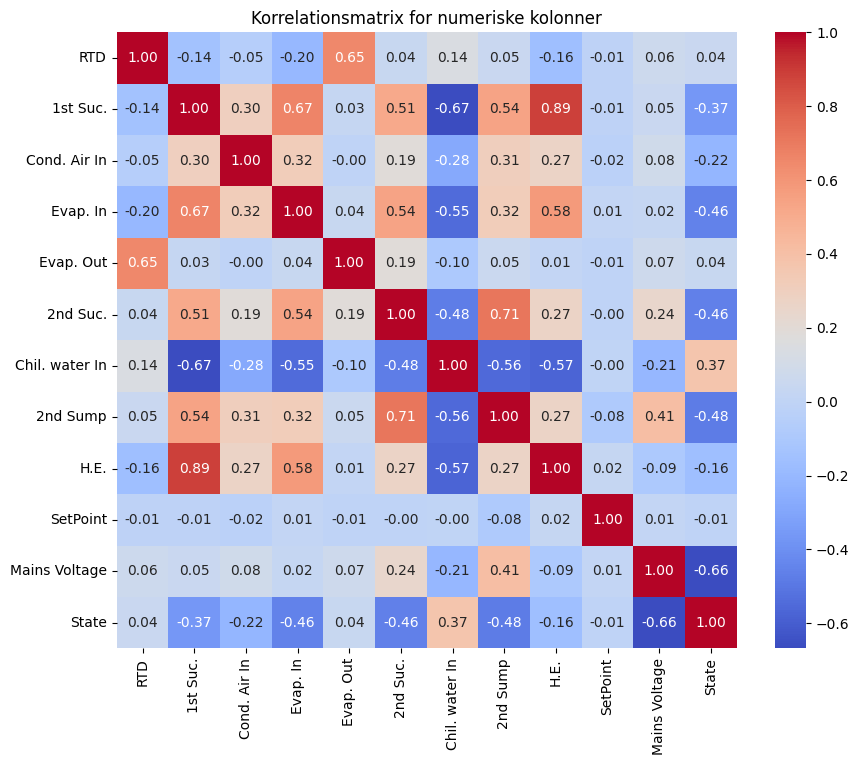

In [10]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korrelationsmatrix for numeriske kolonner")
plt.show()


BOXPLOT / Varians analyse

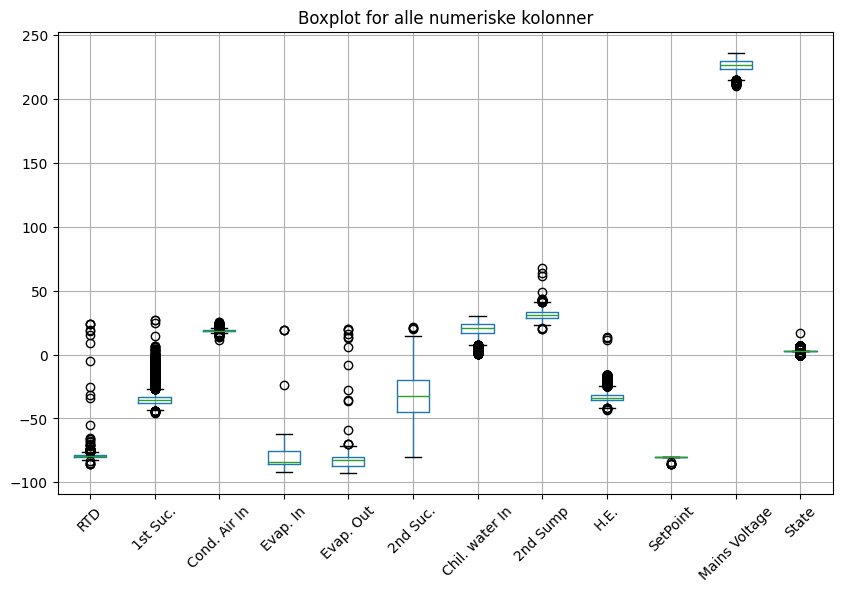

In [13]:
# Take a random sample of 5000 rows to reduce load
sampled_df = numeric_df.sample(n=5000, random_state=1)

# Generate the boxplot with the sampled data
plt.figure(figsize=(10, 6))
sampled_df.boxplot()
plt.title("Boxplot for alle numeriske kolonner")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()


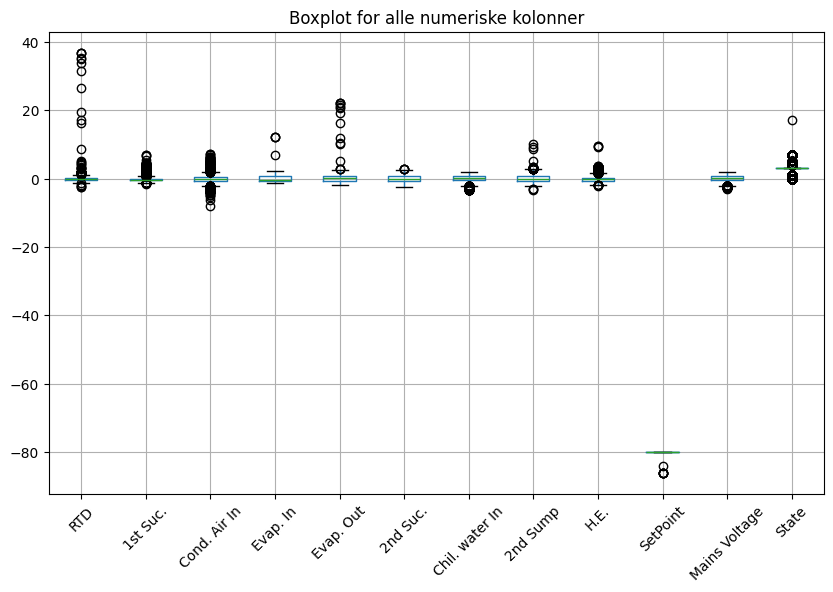

In [14]:
# Take a random sample of 5000 rows to reduce load
sampled_df_normalized = df_normalized.sample(n=5000, random_state=1)

# Generate the boxplot with the sampled data
plt.figure(figsize=(10, 6))
sampled_df_normalized.boxplot()
plt.title("Boxplot for alle numeriske kolonner")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()


PCA

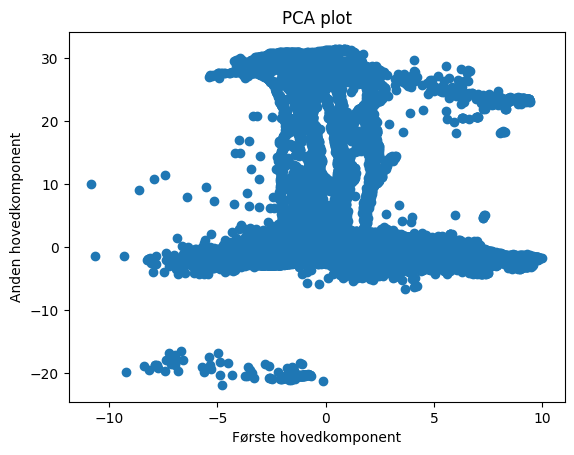

In [28]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.select_dtypes(include=[float, int]))

# Kør PCA (sæt n_components til 2 for at kunne plotte i 2D)
pca = PCA(n_components=len(scaled_data.T))
pca_data = pca.fit_transform(scaled_data)

# Plot PCA-resultatet
plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.xlabel("Første hovedkomponent")
plt.ylabel("Anden hovedkomponent")
plt.title("PCA plot")
plt.show()

Forklaret varians af hver komponent: [0.35720724 0.15583035 0.12722614 0.08489095 0.07120978 0.05924921
 0.05125828 0.03739905 0.02450175 0.01437795 0.01257958 0.00426973]


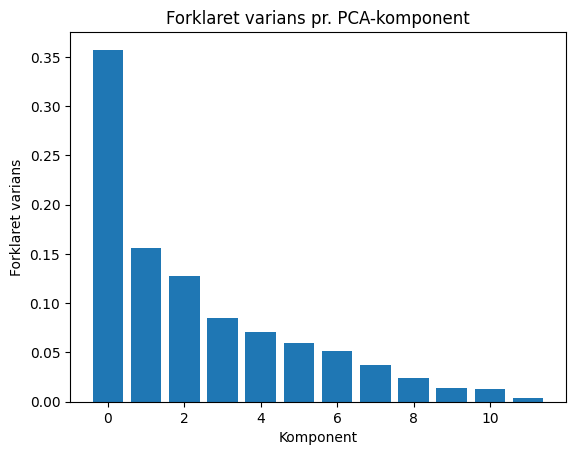

In [29]:
explained_variance = pca.explained_variance_ratio_
print("Forklaret varians af hver komponent:", explained_variance)

# Plot forklaret varians for hver komponent
plt.bar(range(len(explained_variance)), explained_variance)
plt.xlabel("Komponent")
plt.ylabel("Forklaret varians")
plt.title("Forklaret varians pr. PCA-komponent")
plt.show()